# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Linear Regression with Advertising Dataset</p>

<div class="alert alert-block alert-info alert">  
    
## <span style ="color:#f2074e;">List of Contents
**Introduction**
* What is Machine Learning?
* Types of Machine Learning
   
**Linear Regression**
* Scikit-Learn
* Data Setup and Model Training
* Train | Test Split
* Creating a Model (Estimator)
* Model Deployment
* Saving and Loading a Model

## Introduction
### What is Machine Learning?
* Machine Learning (ML) in general is the study of statistical computer algorithms that improve automatically through data.
* This means unlike typical computer algorithms that rely on human input for what approach to take, ML algorithms infer best approach from the data itself.
* ML is a subset of Artificial Intelligence.
* What kinds of problems can ML solve?
    * Credit scoring
    * Insurance risk
    * Price, sales or profits forecasting
    * Spam Filtering
    * Customer Segmentation
    * Handwriting identification
    * Cancer Detection and so on.
* Structure of ML problem framing:
    * Given features from a data set obtain a desired **label**.
    * ML algorithms are often called **estimators** since they are estimating the desired label or output.
* ML algorithms rely on data and set of statistical methods to learn **what features are important** in data.
* For example, using ML algorithms, we can predict the price a house should sell at given its current features (Area, Bedrooms, Bathrooms, etc...)
* The biggest challenge with effective ML is good data. Meajority of development time is spent **cleaning and organizing data**, not implementing ML algorithms.

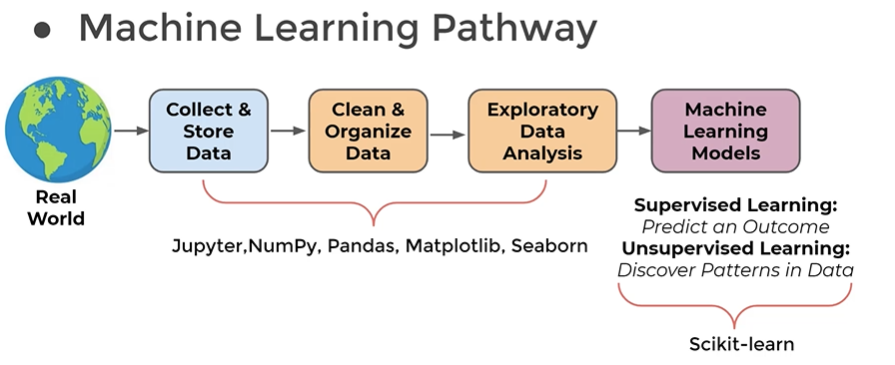

### Types of Machine Learning
* There are two main types of ML we will cover: Supervised Learning and Unsupervised Learning.
* **Supervised Learning:** Using **historical** (e.g. the previous house prices) and **labeled data** (the desired output is known), this ML model predicts a value.
* There are two main label types in Supervised Learning:
    * Categorical value to predict (**classification** task, for exampe, cancerous vs. benign tumor)
    * Continues value to predict (**regression** task, for example, future prices)
* **Supervised ML process**

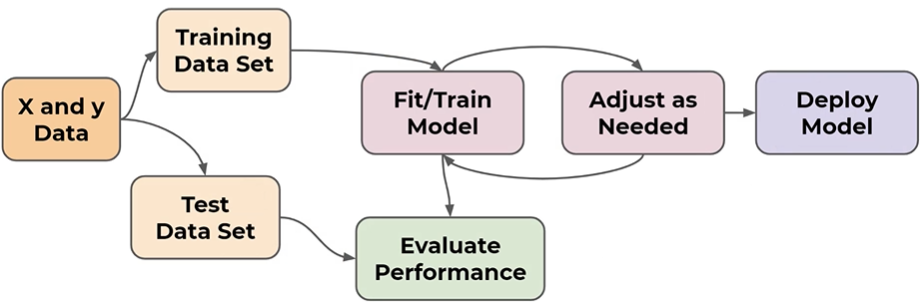

* **Unsupervised Learning:** Applied to **unlabeled data**, the ML model discovers possible patterns in the data.
* Group and interpret data without a label. For example, **clustering** customers into separate groups based on their behaviour features.
* Since there is no historical "correct" label, it is harder to evaluate performance of an unsupervised learning algorithm.

# Linear Regression

* **Ordinary Least Squares (OLS)** works by minimizing the sum of the squares of the differences between the observed dependent variable in the given dataset and those predicted by the linear function.
* The equation of a simple straight line: **y=mx+b**
* In this equation **m** is slope and **b**(intercept) is where the line crosses the y-axis when x=0).

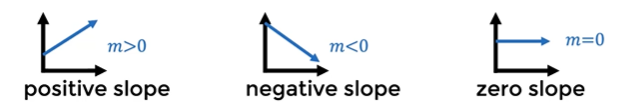

* The y hat symbol displays a prediction. There is usually no set of Betas to create a perfect fit to y.

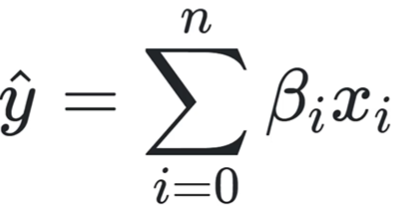

* In a linear regression, where we try to formulate the relationship between variables, y=mx+b becomes

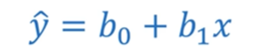

* Our goal is to predict the value of a **dependent variable (y)** based on that of an **independent variable (x)**.
#### Limitation of Linear Regression
* Anscombe's quartet: Each graph below results in the same calculated regression line:

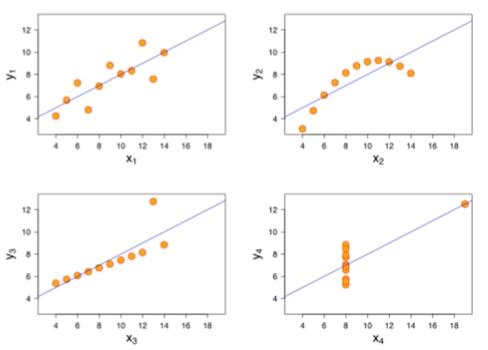

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In this notebook, we are going to use the "Advertising" dataset to understand how effective TV, radio, and newspapers are on sales and we will predict the sales (y) based on the spend on these media.

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Feature Engineering

In [5]:
# Engineered feature
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]

In [6]:
# df with additional total_spend feature
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


#### Relationship between total_spend and sales

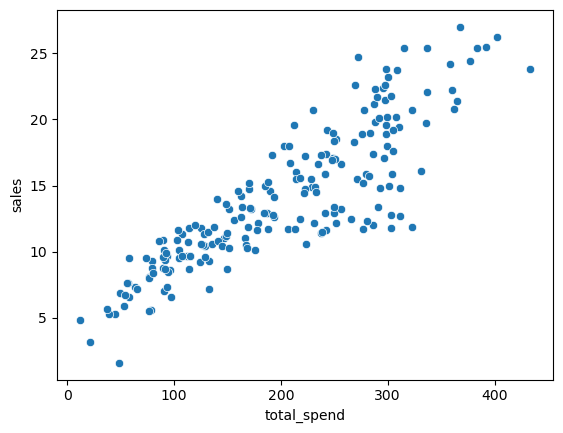

In [7]:
sns.scatterplot(df, x="total_spend", y="sales");  # y is the dependent variable

# The more I spend, the more sale; therefore there is a positive regression line

##### Regression line plot (regplot)

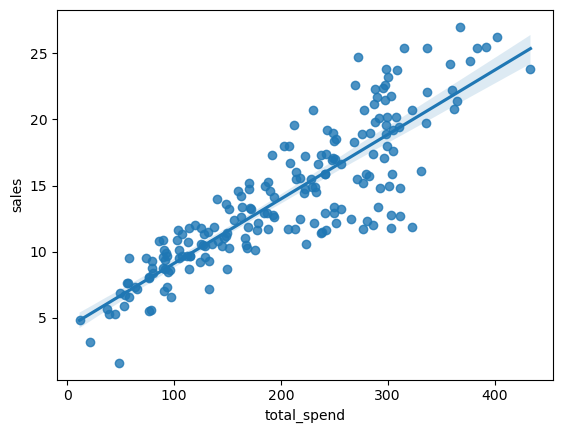

In [8]:
sns.regplot(df, x="total_spend", y="sales");

In [9]:
X = df["total_spend"]
y = df["sales"]

In [10]:
# help(np.polyfit)

# y = mx + b
# y = B1x + B0

In [11]:
np.polyfit(X,y,deg=1) # degree for 1

array([0.04868788, 4.24302822])

These numbers are Beta coeefficients; B1 and B0 respectively. So, we can predict any y values for given x values.

In [12]:
# Let's predict it for these values
potential_spend = np.linspace(0,500,100) 

In [13]:
potential_sales = 0.04868788*potential_spend + 4.24302822

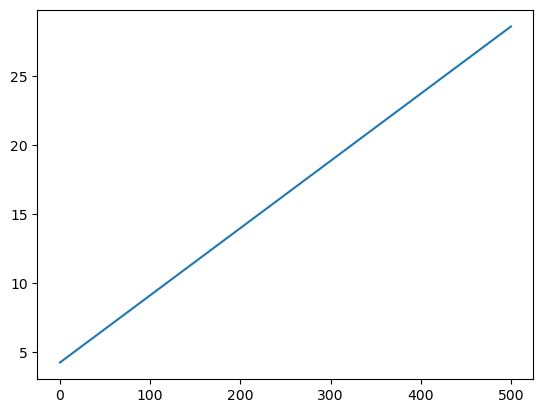

In [14]:
# Let's show the regression line
plt.plot(potential_spend, potential_sales);

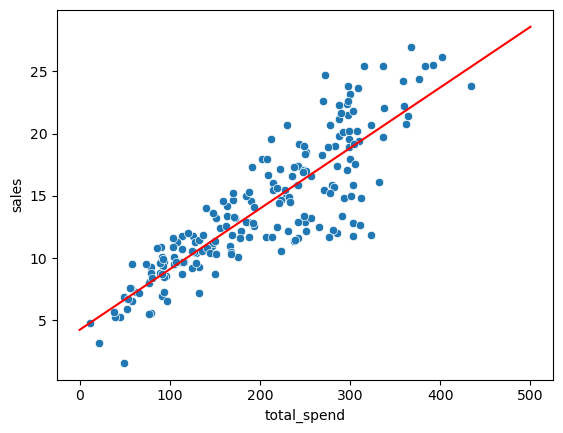

In [15]:
# Let's show this line together with our data

sns.scatterplot(df, x="total_spend", y="sales")
plt.plot(potential_spend, potential_sales, color="red"); # color the line red

#### Let's assume we will spend 200 for advertising. What will be the sales?

In [16]:
spend = 200

# The equation
predicted_sales = 0.04868788*spend + 4.24302822
predicted_sales

13.98060422

#### Let's try it for degree 3, instead of degrree=1.

In [17]:
# y = B3*x**3 + B2*x**2 + B1*x + B0

In [18]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

These values show the effect of the variables and its directions (negative or positive relations).

In [19]:
# Let's predict based on these values again

pot_spend = np.linspace(0,500,100)
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

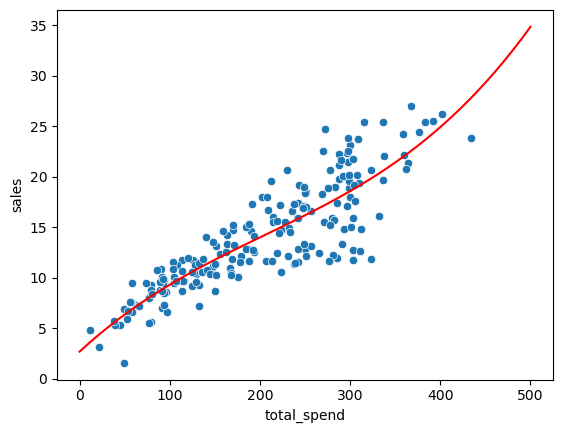

In [20]:
# Let's display it

sns.scatterplot(df, x="total_spend", y="sales")
plt.plot(pot_spend, pred_sales, color="red");

### Scikit-Learn
* Scikit-Learn is a library containing many machine learning algorithms.
* It utilizes a generalized **estimator API** framework to calling the models.
* This means the way algorithms are imported, fitted, and used is **uniform** across all algorithms.
* This allows users to easily swap algorithms in and out and test various approaches.
* Scikit-Learn also comes with many convenience tools, including train test split functions, cross validation tools, and a variety of reporting metric functions.
* Scikit-Learn's approach to model building focuses on applying **models and performance metrics**.
* Syntax:

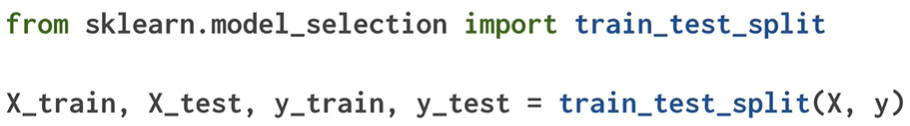

Then...

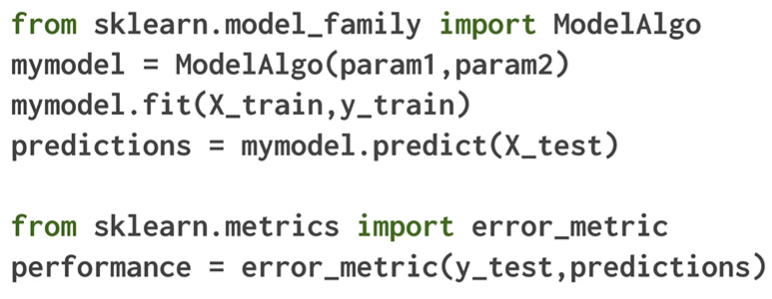

## Data Setup and Model Training
#### What is the relationship between each advertising channel (TV, Radio, Newspaper) and sales?

In [26]:
# Let's import advertising data again (since we created an additional totol_spend feature above)

df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Multiple Features (N-Dimensional)

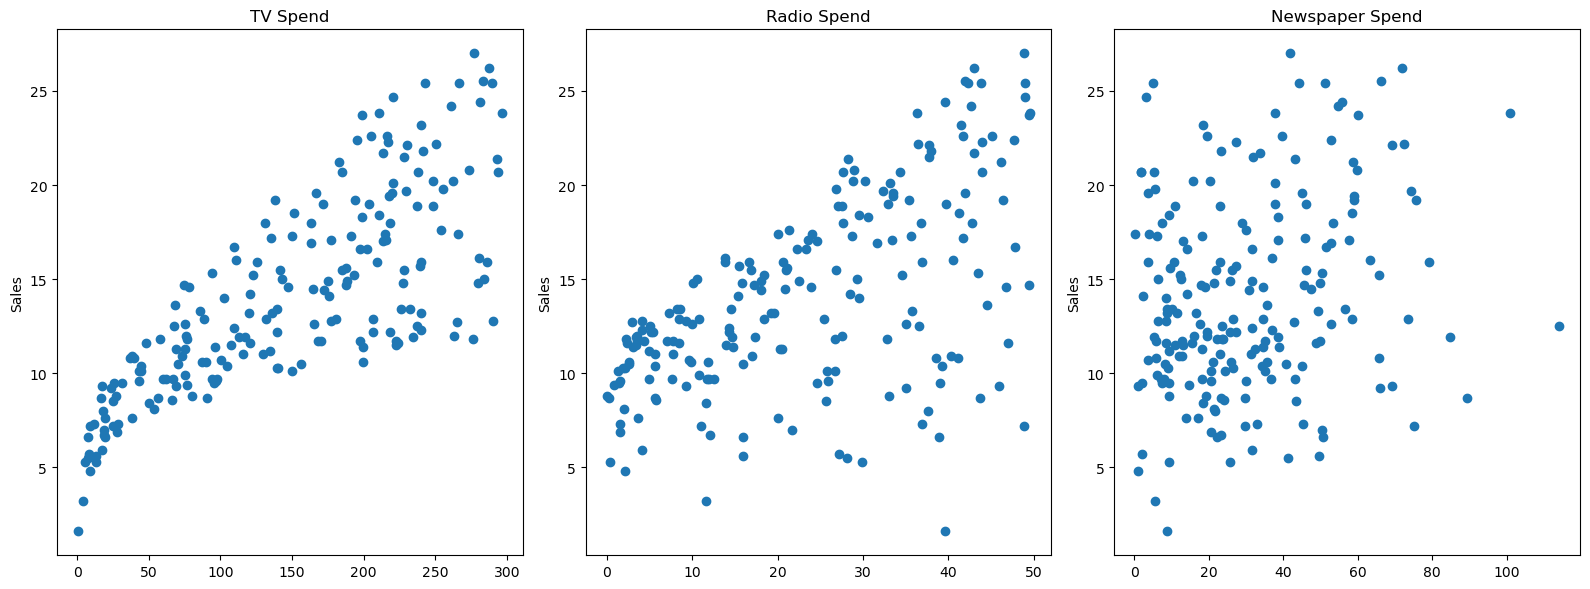

In [27]:
# One way to see it is to use Matpolotlib but Seaborn is more practical

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

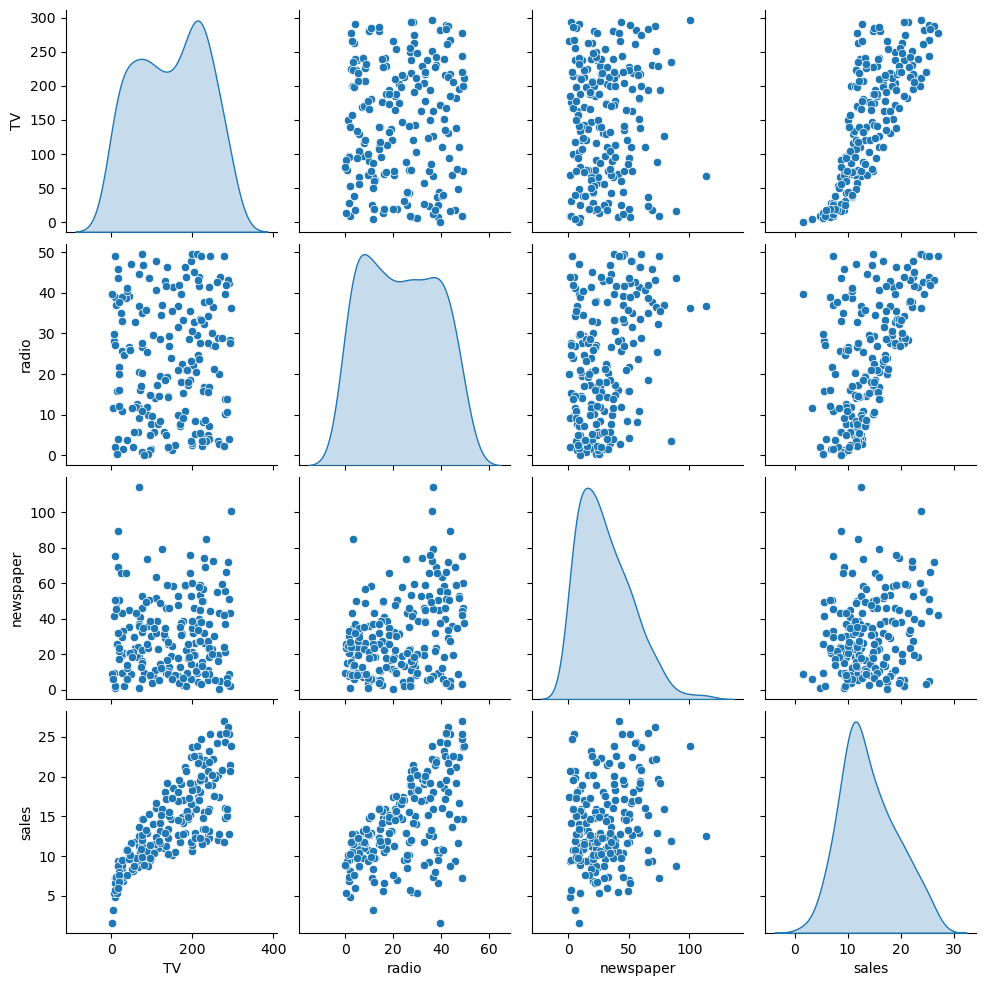

In [28]:
# Relationships between features
sns.pairplot(df,diag_kind='kde');

# or simply
# sns.pairplot(df)

#### X and y features

In [29]:
# drop y (dependent variable) from dataframe to have only X (independent variables)
X = df.drop("sales", axis=1) 

In [30]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [31]:
# y feature: only sales

y = df["sales"]

## Train | Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# help(train_test_split)

In [34]:
# use "shift + tab" after "train_test_split" to copy the syntax

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Change "test_size" according to the size of the data and the model
# random_state is an arbitrary number(42, 101, etc.) which is used to see the same values

#### Let's check the length of the X_train and X_test

In [36]:
# The length of the data
len(df)

200

In [37]:
X_train  # 140 rows, that is 70%

# Since the data is shuffled by scikit-learn, train set does not have an index order

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [41]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [42]:
# The length of the X_test
len(X_test) # 60 rows, that is 30%

60

## Creating a Model (Estimator)

### Import the model

In [44]:
# for linear regression, use linear_model
from sklearn.linear_model import LinearRegression

### Create an instance of the model with parameters

In [46]:
# help(LinearRegression) # to see the parameters

In [47]:
# create the model with default parameters

model = LinearRegression()

### Fit the training data
We only fit to the training data, in order to fairly evaluate the model's performance on future data.

In [48]:
model.fit(X_train, y_train)

LinearRegression()

### Evaluation on the Test Set

### Metrics
The three most common evaluation metrics for regression problems:

**1.Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

The issue with MAE: It won't punish large errors.

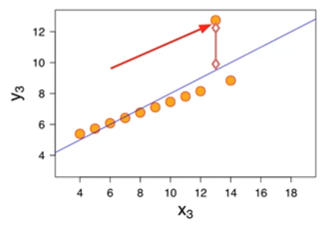

**2.Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

The issue with MSE: It reports units of y squared.

**3.Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

##### Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Compare your error metric to the average value of the label in your data set to get an intuition of its overall performance.

### Calculate Performance on Test Set

We only pass in test features. The model predicts its own y hat. We can then compare these results to the true y test label value.

In [51]:
test_predictions = model.predict(X_test) 

In [52]:
test_predictions # our predicted 60 values

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

#### Compare X_test and y_test through error metrics

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [56]:
# Before howing the error metrics, let's look at the mean of y (sales)

df["sales"].mean()

14.0225

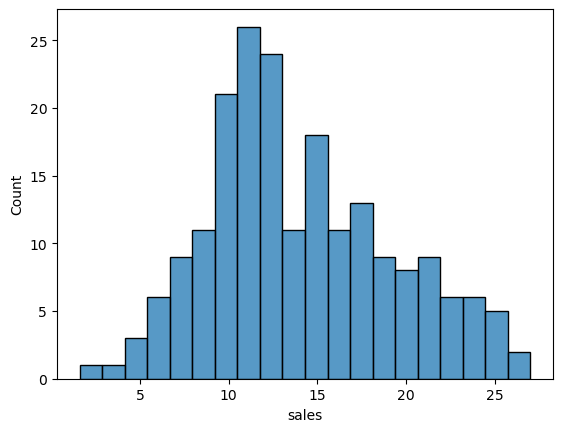

In [59]:
# The distribution of sales

sns.histplot(data=df,x="sales", bins=20);

In [61]:
MAE = mean_absolute_error(y_test,test_predictions)  # (y_true,y_pred)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [62]:
MAE 

1.2137457736144803

Compared to the mean (14.0225), there is less than 10% error in prediction. Whether it is acceptable or not depends on the context.

In [63]:
MSE

2.2987166978863782

We cannot directly compare MSE to the average sales value because it is the squared terms of y.

In [64]:
RMSE

1.516151937599388

The difference bewtween MAE and RMSE shows that there are some values far off the rest. While MAE does not punishes these large errors, RMSE does.

## Residuals

* Often for Linear Regression it is a good idea to separately evaluate residuals (y-y hat) and not just calculate performance metrics (e.g. RMSE).
* Residual plot shows residual error vs. true y value.

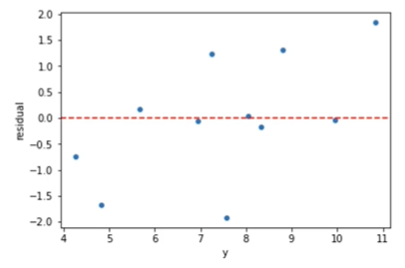

* If the residual plot shows a clear patterns, it indicates that Linear Regression is no valid. We should choose another model.

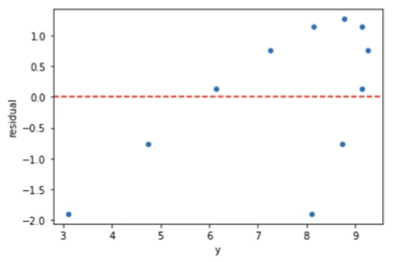

#### Plottting Residuals
It's also important to plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice.

In [66]:
# If our model was perfect, these would all be zeros
test_residuals = y_test - test_predictions # real y values - predicted values (X_test)

In [67]:
test_residuals # all errors

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

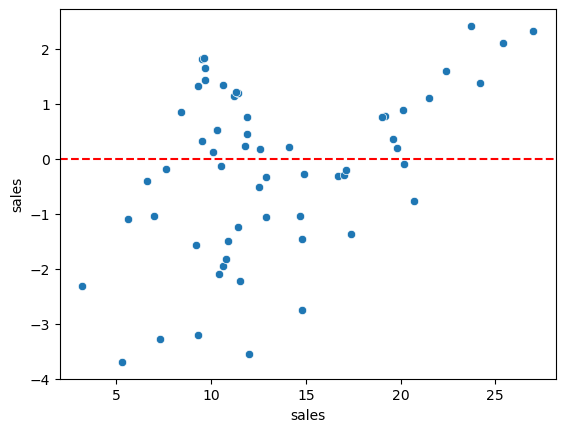

In [70]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0, color='r', linestyle='--'); # red horizontal line

# There must be no pattern but look random and be distributed around zero.

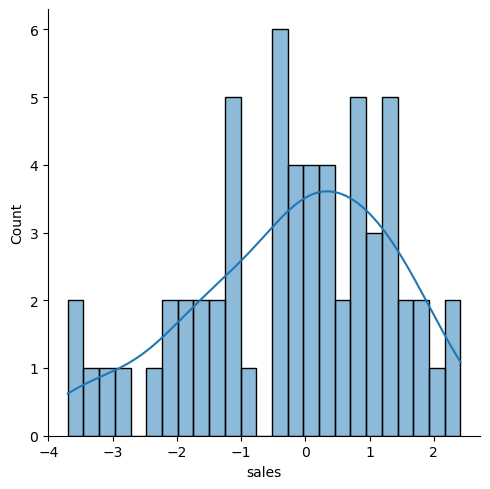

In [71]:
sns.displot(test_residuals,bins=25,kde=True);
# the shape of the kde plot looks almost normal distributed

## Model Deployment

### Retraining Model on Full Data

* If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data.
* If we are not satisfied, we can update parameters or choose another model.
* Also, polynomial regression and regularization can be used as model adjustments.

### Final Model Fit

In [72]:
# Create the final model amd fit it for the whole data set

final_model = LinearRegression()

In [73]:
final_model.fit(X,y)

LinearRegression()

**Note:** It may not really make sense to recalulate RMSE metrics here, since the model has already seen all the data. It is not a fair judgement of performance to calculate RMSE on data its already seen, thus the purpose of the previous examination of test performance.

In [74]:
y_hat = final_model.predict(X)

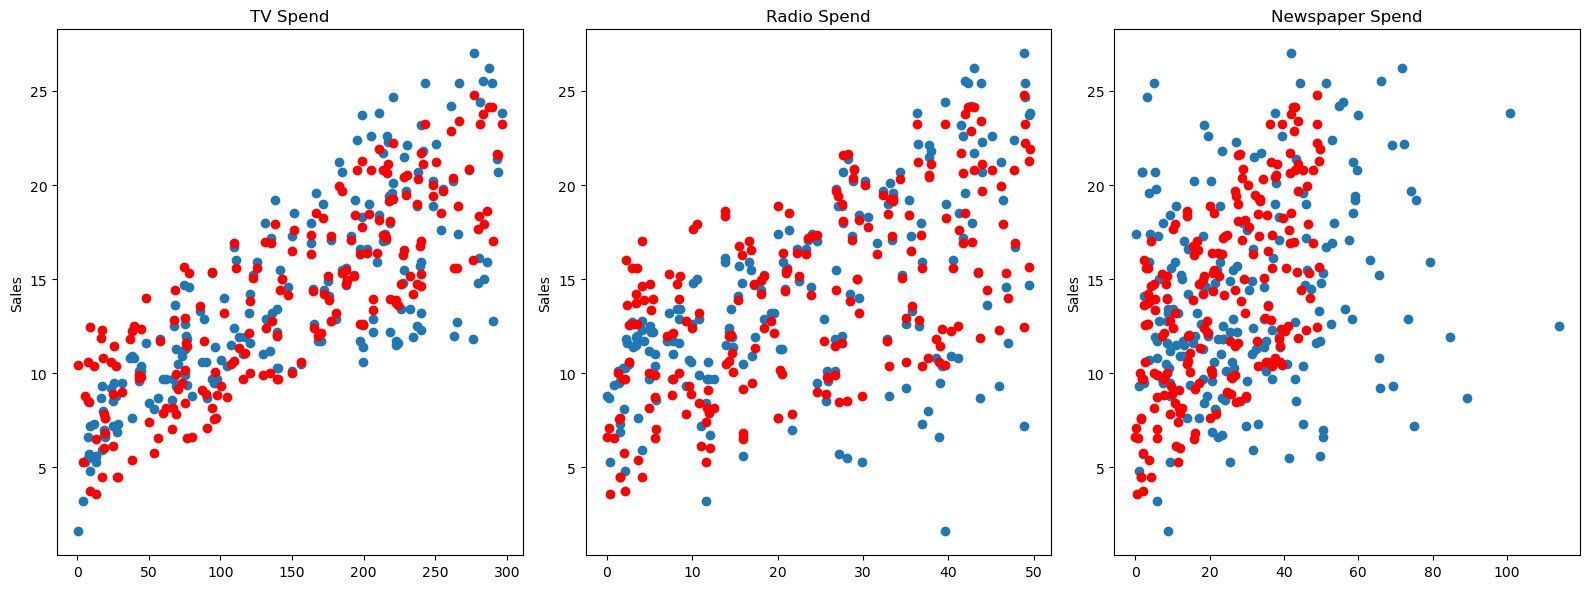

In [75]:
# Let's show the plot for three features in Advertising data set: y vs. y_hat (true values vs predicted values)

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

# For TV
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

# For Radio
axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

# For Newspaper
axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

### Residuals
Should be normally distributed.

In [76]:
residuals = y_hat - y

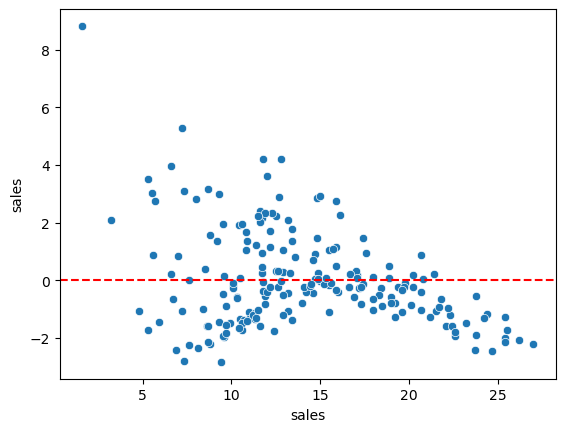

In [78]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--');

### Coefficients

In [79]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [80]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


#### Interpreting the coefficients:

* Holding all other features fixed, a 1 unit (A thousand dollars) **increase in TV Spend** is associated with an **increase in sales of  0.045** "sales units".
* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.

----
* Holding all other features fixed, a 1 unit (A thousand dollars) **increase in Radio Spend** is associated with an **increase in sales of  0.188** "sales units". 
* This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.
  
----
* Holding all other features fixed, a 1 unit (A thousand dollars) **increase in Newspaper Spend** is associated with a **decrease in sales of  0.001** "sales units". 
* This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that **newspaper spend has no real effect on sales**.

**Important Note:** In this dataset, all our units were the same for each feature (1 unit = $1000 of ad spend). But in other datasets, units may not be the same, such as a housing dataset could try to predict a sale price with both a feature for number of bedrooms and a feature of total area like square footage. In this case, it would make more sense to *normalize* the data, in order to clearly compare features and results.

In [82]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Prediction on New Data

Recall , X_test data set looks *exactly* the same as brand new data, so we simply need to call .predict() just as before to predict sales for a new advertising campaign.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [83]:
campaign = [[149,22,12]]

In [84]:
final_model.predict(campaign)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

## Saving and Loading a Model

In [86]:
from joblib import dump, load

In [87]:
# To save the model
dump(final_model, "final_sales_model.joblib")

['final_sales_model.joblib']

In [88]:
# To load the saved model and use it...

loaded_model = load("final_sales_model.joblib") 

This is our trained regression model

In [89]:
# check the coefficients
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])